<a href="https://colab.research.google.com/github/Vijaycriss/Disaster_tweets_classification/blob/main/Disaster_tweets_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#classification model to predict the sentiment either (1 or 0) based on Disaster tweets

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/disaster_tweets_data(DS).csv')

In [3]:
df.head()

,tweets,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.shape

(7613, 2)

In [5]:
df.isnull().sum()

tweets    0
target    0
dtype: int64

In [6]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


##Tokenizing

In [8]:
'''import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df['tweets'] = df['tweets'].apply(lambda x : word_tokenize(x))
print(df.head())'''

"import nltk\nnltk.download('punkt')\nfrom nltk.tokenize import word_tokenize\n\ndf['tweets'] = df['tweets'].apply(lambda x : word_tokenize(x))\nprint(df.head())"

In [9]:
df.tail()

,tweets,target
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1
7612,The Latest: More Homes Razed by Northern Calif...,1


#Convert words to lower case

In [10]:
df["tweets"] = df["tweets"].apply(lambda x: x.lower())
df.head()

,tweets,target
0,our deeds are the reason of this #earthquake m...,1
1,forest fire near la ronge sask. canada,1
2,all residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,just got sent this photo from ruby #alaska as ...,1


##Removing Punctuations

In [11]:
import re

# removing punctuation
df['tweets'] = df['tweets'].str.replace(r'[^\w\s]+',' ').str.strip()

<ipython-input-11-23ad745c2ad7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweets'] = df['tweets'].str.replace(r'[^\w\s]+',' ').str.strip()


In [12]:
#removing URls
df['tweets'] = df['tweets'].str.replace(r'/s*https?:///S+(/s+|$)', '').str.strip()

<ipython-input-12-49446d5d37d7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweets'] = df['tweets'].str.replace(r'/s*https?:///S+(/s+|$)', '').str.strip()


In [13]:
df['tweets'] = df['tweets'].str.replace('/d+', '')

<ipython-input-13-ee5d93e2fb7b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweets'] = df['tweets'].str.replace('/d+', '')


In [14]:
df.head()

,tweets,target
0,our deeds are the reason of this earthquake m...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are ...,1
3,13 000 people receive wildfires evacuation or...,1
4,just got sent this photo from ruby alaska as ...,1


##Removing Stop words

In [15]:
import nltk
from nltk.corpus import stopwords

# Removing the Stop Words From the Text Column

nltk.download('stopwords')

stop = set(stopwords.words("english"))


def remove_stopwords(text):
  filtered_words =  [word.lower() for word in text.split() if word.lower() not in stop]
  return " ".join(filtered_words)


df["tweets"] = df["tweets"].map(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
df.head()

,tweets,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,13 000 people receive wildfires evacuation ord...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


##Stemming or lemmatizing the words

In [17]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
# Apply Lemamtization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["tweets"] = df["tweets"].apply(lambda text: lemmatize_words(text))
df.head()

,tweets,target
0,deed reason earthquake may allah forgive u,1
1,forest fire near la ronge sask canada,1
2,resident asked shelter place notified officer ...,1
3,13 000 people receive wildfire evacuation orde...,1
4,got sent photo ruby alaska smoke wildfire pour...,1


In [19]:
df.head()

,tweets,target
0,deed reason earthquake may allah forgive u,1
1,forest fire near la ronge sask canada,1
2,resident asked shelter place notified officer ...,1
3,13 000 people receive wildfire evacuation orde...,1
4,got sent photo ruby alaska smoke wildfire pour...,1


##Train and Test Split

In [20]:
x = df['tweets']
y = df['target']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state= 0)

##Count Vectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

##Multinomial Naïve Bayes Classification

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.805


##Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(count_train, y_train)
pred_lg = lg.predict(count_test)
score = metrics.accuracy_score(y_test, pred_lg)
print("accuracy:  %0.3f" % score)

accuracy:  0.807


##KNN Classification

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(count_train, y_train)
pred_knn = knn.predict(count_test)
score = metrics.accuracy_score(y_test, pred_knn)
print("accuracy:  %0.3f" % score)

accuracy:  0.716


In [26]:
pred = mnb.predict(count_test)
pred_lg = lg.predict(count_test)
pred_knn = knn.predict(count_test)
print(pred)
print(pred_lg)
print(pred_knn)

[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]
[0 0 0 ... 0 0 1]


##Confusion matrix and classification report

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
confusion_NB = confusion_matrix(y_test, pred)
confusion_LG = confusion_matrix(y_test, pred_lg)
confusionKNN = confusion_matrix(y_test, pred_knn)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

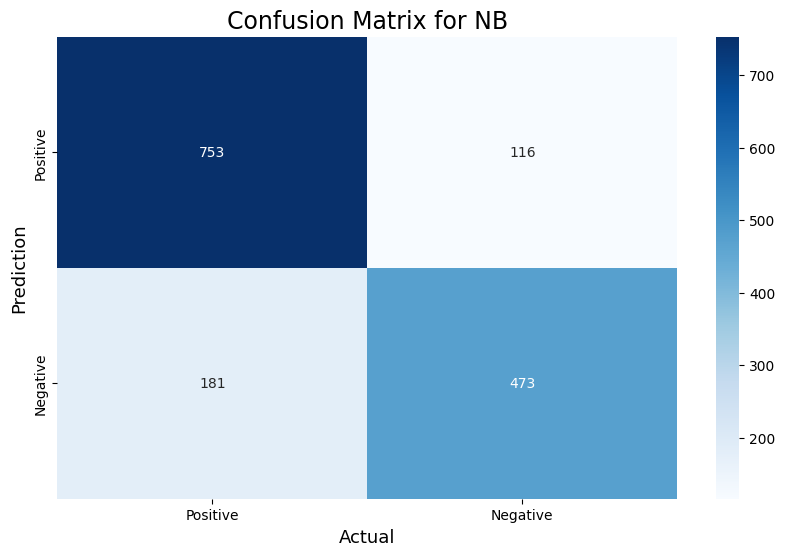

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_NB, annot=True, fmt="d", cmap="Blues",xticklabels=['Positive','Negative'], yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for NB',fontsize=17)
plt.show()

In [31]:
report_NB = classification_report(y_test, pred)
print(f'Classification Report:\n{report_NB}')

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       869
           1       0.80      0.72      0.76       654

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.80      1523
weighted avg       0.80      0.80      0.80      1523



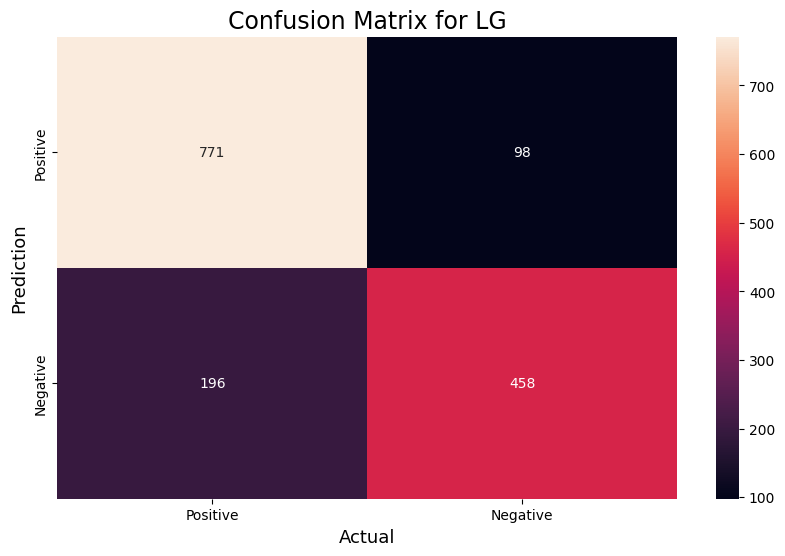

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_LG, annot=True, fmt="d",xticklabels=['Positive','Negative'], yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for LG',fontsize=17)
plt.show()

In [33]:
report_LG = classification_report(y_test, pred_lg)
print(f'Classification Report:\n{report_LG}')

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       869
           1       0.82      0.70      0.76       654

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



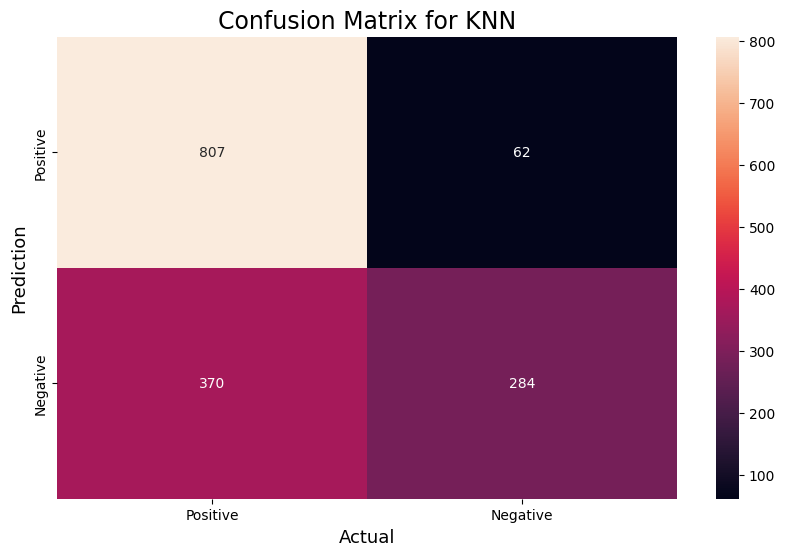

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(confusionKNN, annot=True, fmt="d",xticklabels=['Positive','Negative'], yticklabels=['Positive','Negative'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix for KNN',fontsize=17)
plt.show()

In [35]:
report_KNN = classification_report(y_test, pred_knn)
print(f'Classification Report:\n{report_KNN}')

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       869
           1       0.82      0.43      0.57       654

    accuracy                           0.72      1523
   macro avg       0.75      0.68      0.68      1523
weighted avg       0.74      0.72      0.69      1523



##model with the best accuracy.

In [36]:
accuracy_nb = accuracy_score(y_test, pred)
accuracy_lg = accuracy_score(y_test, pred_lg)
accuracy_knn = accuracy_score(y_test, pred_knn)


In [37]:
accuracy_scores = {
    'Multinomial Naïve Bayes': accuracy_nb,
    'Logistic Regression': accuracy_lg,
    'K-Nearest Neighbors': accuracy_knn
}
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model]

print("Model with the best accuracy:", best_model)
print("Best accuracy:", best_accuracy * 100)

Model with the best accuracy: Logistic Regression
Best accuracy: 80.69599474720945


##Hyperparameter tuning

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the hyperparameter distributions
param_dist = {
     'C': uniform(loc=0, scale=1),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': randint(low=100, high=1000)
}

# Create the model with default hyperparameters
model = lg

# Perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(count_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(count_test, y_test)
print(accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

0.8063033486539725


##Predicting the model using joblib

In [39]:
import joblib

joblib.dump(lg, 'model.joblib')

load_model = joblib.load('model.joblib')

joblib.dump(count_vectorizer, 'vectorizer.joblib')

vectorizer = joblib.load('vectorizer.joblib')



In [40]:
#predicting the traget by giving input
input = vectorizer.transform(["abcnews uk scandal 2009 caused major upheaval parliamentary expense subsequent sacking prison waiting"])

predictions = load_model.predict(input)

print(predictions)

[0]


In [41]:
#validating for logistic regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k=7
kf= KFold(n_splits= k)

scores_train = cross_val_score(lg, count_train,y_train, cv=kf)
scores_test = cross_val_score(lg, count_test,y_test, cv=kf)

print("Cross-Validation Scores:", scores_train)
print("Cross-Validation Scores:", scores_test)

# Calculate and print the mean and standard deviation of the scores
print("Mean Score for train:", scores_train.mean())
print("Mean Score for test:", scores_test.mean())
print("Standard Deviation:", scores_train.std())
print("Standard Deviation:", scores_test.std())

Cross-Validation Scores: [0.78850575 0.78390805 0.80804598 0.80574713 0.78390805 0.78275862
 0.81264368]
Cross-Validation Scores: [0.77522936 0.78899083 0.78440367 0.7706422  0.73732719 0.74193548
 0.76036866]
Mean Score for train: 0.7950738916256158
Mean Score for test: 0.765556770207343
Standard Deviation: 0.012159939955056572
Standard Deviation: 0.018537884068539012


In [42]:
#saving the test data in csv file
df_test = pd.DataFrame({'tweets': X_test, 'target': y_test})

df_test.to_csv('test_data.csv', index = False)